In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train_df = pd.read_csv('ECG_dataset/train.csv', header=None)
test_df = pd.read_csv('ECG_dataset/test.csv', header=None)
validation_df = pd.read_csv('ECG_dataset/validation.csv', header=None)
train_val_df = pd.read_csv('ECG_dataset/trainval.csv', header=None)

In [3]:
print(train_df.shape)
print(test_df.shape)
print(train_val_df.shape)
print(validation_df.shape)

(1081, 141)
(180, 141)
(1622, 141)
(541, 141)


In [4]:
train_val_df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046114,...,0.051275,0.061244,0.053409,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836,0.030809
1,0,0.424380,0.344420,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,...,0.526440,0.559020,0.555670,0.59727,0.570760,0.467490,0.463400,0.481880,0.432190,0.394530
2,0,1.529500,1.776600,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,...,0.169600,0.126170,0.258300,0.23859,0.465590,0.640280,0.727650,0.867870,1.058600,1.295300
3,0,1.286500,1.049900,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,...,0.966370,1.106500,1.091900,1.30260,1.572700,1.733700,1.740600,1.711700,1.579300,1.514100
4,1,-0.175400,-0.121920,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,...,-0.234150,-0.248470,-0.177590,-0.22301,-0.277270,-0.233280,-0.252610,-0.264220,-0.176390,-0.154930


In [5]:
train_val_df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046114,...,0.051275,0.061244,0.053409,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836,0.030809
1,0,0.424380,0.344420,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,...,0.526440,0.559020,0.555670,0.59727,0.570760,0.467490,0.463400,0.481880,0.432190,0.394530
2,0,1.529500,1.776600,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,...,0.169600,0.126170,0.258300,0.23859,0.465590,0.640280,0.727650,0.867870,1.058600,1.295300
3,0,1.286500,1.049900,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,...,0.966370,1.106500,1.091900,1.30260,1.572700,1.733700,1.740600,1.711700,1.579300,1.514100
4,1,-0.175400,-0.121920,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,...,-0.234150,-0.248470,-0.177590,-0.22301,-0.277270,-0.233280,-0.252610,-0.264220,-0.176390,-0.154930


In [6]:
train_val_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,...,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000
mean,0.433416,-0.036016,-0.045188,-0.045672,-0.049168,-0.043938,-0.040988,-0.045761,-0.027983,-0.025155,...,0.010448,-0.003967,-0.014199,-0.025107,-0.028752,-0.018673,-0.024628,-0.018323,-0.025027,-0.020046
std,0.495700,1.043552,1.033026,1.059581,1.073212,1.073390,1.048928,1.038336,1.026696,1.036409,...,0.963966,0.984996,1.009911,1.027390,1.044897,1.026177,1.003175,1.005006,1.020588,1.032291
min,0.000000,-5.000500,-4.980600,-5.107400,-4.892400,-4.837500,-4.595400,-4.549900,-4.715100,-4.578100,...,-4.590400,-4.568700,-4.930800,-4.607600,-4.694400,-4.998700,-4.762400,-4.931600,-4.673200,-4.758000
25%,0.000000,-0.367832,-0.374685,-0.378947,-0.378458,-0.379707,-0.385395,-0.397902,-0.354347,-0.366583,...,-0.295070,-0.272665,-0.284360,-0.311368,-0.327002,-0.350567,-0.340367,-0.353573,-0.359565,-0.383135
50%,0.000000,0.195595,0.179445,0.191505,0.191205,0.186035,0.167070,0.174170,0.179175,0.172515,...,0.192110,0.199530,0.200855,0.195860,0.199300,0.196795,0.192845,0.197325,0.200905,0.199975
75%,1.000000,0.520345,0.520720,0.537245,0.544137,0.538685,0.533610,0.536147,0.542270,0.546090,...,0.527705,0.517665,0.523183,0.534433,0.530830,0.542895,0.526315,0.536385,0.538017,0.536225
max,1.000000,2.660600,2.451900,2.509500,2.337500,2.473100,2.564600,2.763900,2.903600,3.611900,...,2.308800,2.413300,2.435900,2.242900,2.299900,2.576500,2.643500,2.696800,2.678600,2.971600


<AxesSubplot:xlabel='0', ylabel='count'>

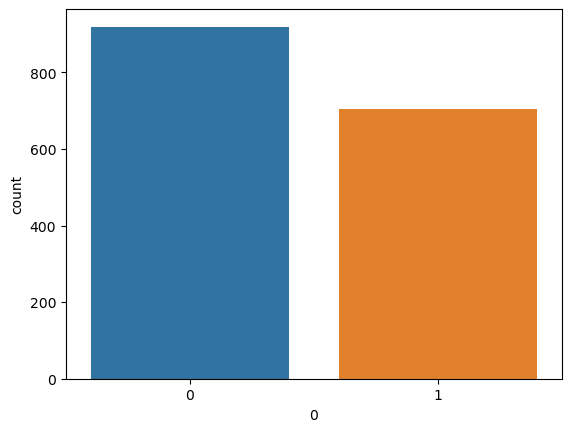

In [7]:
# plot countplot for first column
sns.countplot(x=0, data=train_val_df)

In [8]:
# train_df.iloc[0:]

In [9]:
#Showing the info of train and test data
print('#############Train data#############')
print(train_df.info())
print('#############Test data#############')
print(test_df.info())
#taking a sample of the test data (for reasons of plotting later)
sample = train_df.sample(25)
sampleX= sample.iloc[:,1:]
sampleY=sample.iloc[:,0]
print('#############Sample Info#############')
print(sampleX.info())

#############Train data#############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081 entries, 0 to 1080
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 1.2 MB
None
#############Test data#############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 198.4 KB
None
#############Sample Info#############
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1016 to 592
Columns: 140 entries, 1 to 140
dtypes: float64(140)
memory usage: 27.5 KB
None


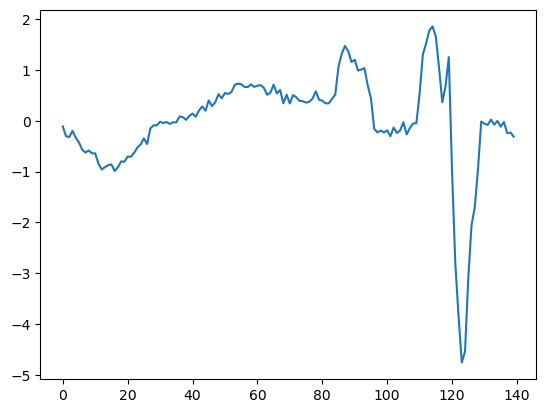

In [10]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(0,140)),sampleX.iloc[10])

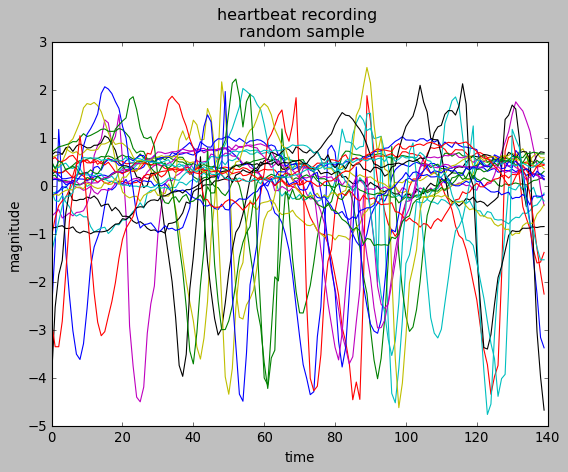

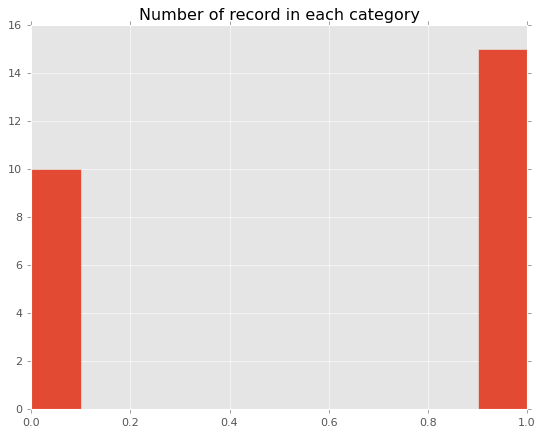

In [11]:
#ploting sample data information

plt.style.use('classic')
#ploting the samples
for index, row in sampleX.iterrows():
    plt.plot(np.array(range(0,140)), row)
    
plt.xlabel('time')
plt.ylabel('magnitude')
plt.title("heartbeat recording \n random sample")
plt.show()



plt.style.use('ggplot')
plt.title("Number of record in each category")
plt.hist(sample.iloc[:,0].transpose())
plt.show()

In [12]:
#number of labels for train and test
print("Train data")
print("Type\tCount")
print(train_df.iloc[:,0].value_counts())
print('####################################')
print("Test data")
print("Type\tCount")
print(test_df.iloc[:,0].value_counts())

Train data
Type	Count
0    630
1    451
Name: 0, dtype: int64
####################################
Test data
Type	Count
0    102
1     78
Name: 0, dtype: int64


In [13]:
print('----------X_train and y_train----------')
X_train = train_df.iloc[:,1:]
# y_train= to_categorical(train_df.iloc[:,0])
y_train= train_df.iloc[:,0]
print(X_train.head())
print(X_train.info())

print('----------X_test and y_test----------')
X_test = test_df.iloc[:,1:]
# y_test= to_categorical(test_df.iloc[:,0])
y_test= test_df.iloc[:,0]
print(X_test.head())
print(X_test.info())

----------X_train and y_train----------
        1         2         3         4         5         6         7    \
0  0.024133  0.016065  0.044639  0.031001 -0.009473 -0.042663 -0.077283   
1  0.424380  0.344420  0.348130  0.340170  0.243370  0.241730  0.268780   
2  1.529500  1.776600  1.936700  1.840200  1.800000  1.724900  1.405800   
3  1.286500  1.049900  0.793600  0.473590  0.111730 -0.054857 -0.062095   
4 -0.175400 -0.121920 -0.053532 -0.024293  0.022917  0.116440  0.187040   

        8         9         10   ...       131       132       133      134  \
0 -0.091508 -0.046114 -0.005557  ...  0.051275  0.061244  0.053409  0.12092   
1  0.273420  0.356440  0.505880  ...  0.526440  0.559020  0.555670  0.59727   
2  1.008800  0.724720  0.430670  ...  0.169600  0.126170  0.258300  0.23859   
3 -0.120750 -0.103010 -0.102480  ...  0.966370  1.106500  1.091900  1.30260   
4  0.240710  0.314340  0.342820  ... -0.234150 -0.248470 -0.177590 -0.22301   

        135       136       137   

In [14]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

13.416407864998739

In [15]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 13, p = 2, metric = 'euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
print(accuracy_score(y_test,y_pred))

0.9611111111111111


In [18]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[96  6]
 [ 1 77]]


Got an accuracy of 96.11% on the KNN

In [19]:
train_val_df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046114,...,0.051275,0.061244,0.053409,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836,0.030809
1,0,0.424380,0.344420,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,...,0.526440,0.559020,0.555670,0.59727,0.570760,0.467490,0.463400,0.481880,0.432190,0.394530
2,0,1.529500,1.776600,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,...,0.169600,0.126170,0.258300,0.23859,0.465590,0.640280,0.727650,0.867870,1.058600,1.295300
3,0,1.286500,1.049900,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,...,0.966370,1.106500,1.091900,1.30260,1.572700,1.733700,1.740600,1.711700,1.579300,1.514100
4,1,-0.175400,-0.121920,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,...,-0.234150,-0.248470,-0.177590,-0.22301,-0.277270,-0.233280,-0.252610,-0.264220,-0.176390,-0.154930


In [20]:
X = train_val_df.iloc[:,1:]
y = train_val_df.iloc[:,0]
y

0       1
1       0
2       0
3       0
4       1
       ..
1617    1
1618    0
1619    0
1620    0
1621    1
Name: 0, Length: 1622, dtype: int64

In [22]:
cols = X.columns

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [24]:
X_train.shape

(1297, 140)

In [25]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

18.027756377319946

In [26]:
# Creating KNN Model.
model1 = KNeighborsClassifier(n_neighbors = 18, p = 2, metric = 'euclidean')
model1.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [27]:
y_pred = model1.predict(X_test)

model1_acc = accuracy_score(y_test,y_pred)
print(model1_acc)

0.96


In [28]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[167   8]
 [  5 145]]


In [29]:
y_pred = model1.predict(validation_df.iloc[:,1:])

In [30]:
model1_val_acc = accuracy_score(validation_df.iloc[:,0],y_pred)
print(model1_val_acc)

0.966728280961183


In [31]:
cm = confusion_matrix(validation_df.iloc[:, 0],y_pred)
print(cm)

[[276  13]
 [  5 247]]


In [32]:
cols = X_train.columns
print(cols)
print(y_train)

MultiIndex([(  1,),
            (  2,),
            (  3,),
            (  4,),
            (  5,),
            (  6,),
            (  7,),
            (  8,),
            (  9,),
            ( 10,),
            ...
            (131,),
            (132,),
            (133,),
            (134,),
            (135,),
            (136,),
            (137,),
            (138,),
            (139,),
            (140,)],
           length=140)
759     0
567     1
937     0
2       0
1494    1
       ..
763     0
835     0
1216    1
559     0
684     0
Name: 0, Length: 1297, dtype: int64


In [33]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,131,132,133,134,135,136,137,138,139,140
0,0.178400,0.306436,0.309521,0.392722,0.484332,0.602470,0.692206,0.712436,0.841000,0.812106,...,-0.257233,-0.288594,-0.187061,-0.143364,-0.156815,-0.123232,-0.035595,0.000000,0.098974,0.138890
1,0.302560,0.391553,0.378250,0.283100,0.248893,0.301450,0.280393,0.279248,0.314413,0.245119,...,0.154150,0.298610,0.404037,0.362034,0.268628,0.354792,0.316999,0.261841,0.253045,0.233345
2,0.326934,0.566643,0.375684,0.500313,0.451075,0.729474,0.657264,0.659130,0.721145,0.708883,...,0.172795,0.053245,0.134839,0.245552,0.053875,0.257098,0.249141,0.185887,0.275941,0.326372
3,1.490362,1.762536,1.883269,1.781501,1.760491,1.679381,1.317654,0.915833,0.600310,0.266040,...,-0.031983,-0.104379,0.060312,0.046089,0.298869,0.491896,0.603055,0.739340,0.938857,1.152971
4,-0.237240,-0.688863,-1.326779,-1.927794,-2.604921,-3.425998,-3.994277,-4.114554,-3.416892,-2.320383,...,0.578239,0.551937,0.494283,0.381828,0.264419,0.155746,0.029465,0.045395,0.130563,0.030554


In [63]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
model2_acc = accuracy_score(y_test,y_pred)
print(model2_acc)

cm = confusion_matrix(y_test,y_pred)
print(cm)

y_pred = model2.predict(validation_df.iloc[:,1:])
model2_val_acc = accuracy_score(validation_df.iloc[:,0],y_pred)
print(model2_val_acc)

cm = confusion_matrix(validation_df.iloc[:, 0],y_pred)
print(cm)

0.48923076923076925
[[95 80]
 [86 64]]
0.5489833641404805
[[152 137]
 [107 145]]


In [35]:
# Ensemble Learning

from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=100, random_state=0)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
model3_acc = accuracy_score(y_test,y_pred)
print(model3_acc)

cm = confusion_matrix(y_test,y_pred)
print(cm)

y_pred = model3.predict(validation_df.iloc[:,1:])
model3_val_acc = accuracy_score(validation_df.iloc[:,0],y_pred)
print(model3_val_acc)

cm = confusion_matrix(validation_df.iloc[:, 0],y_pred)
print(cm)

0.9753846153846154
[[173   2]
 [  6 144]]
0.9815157116451017
[[284   5]
 [  5 247]]


In [36]:
# Support Vector Machine Classifier

from sklearn.svm import SVC
model4 = SVC(kernel='linear', random_state=0)
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
model4_acc = accuracy_score(y_test,y_pred)
print(model4_acc)

cm = confusion_matrix(y_test,y_pred)
print(cm)

y_pred = model4.predict(validation_df.iloc[:,1:])
model4_val_acc = accuracy_score(validation_df.iloc[:,0],y_pred)
print(model4_val_acc)

cm = confusion_matrix(validation_df.iloc[:, 0],y_pred)
print(cm)

0.5661538461538461
[[124  51]
 [ 90  60]]
0.6414048059149723
[[236  53]
 [141 111]]


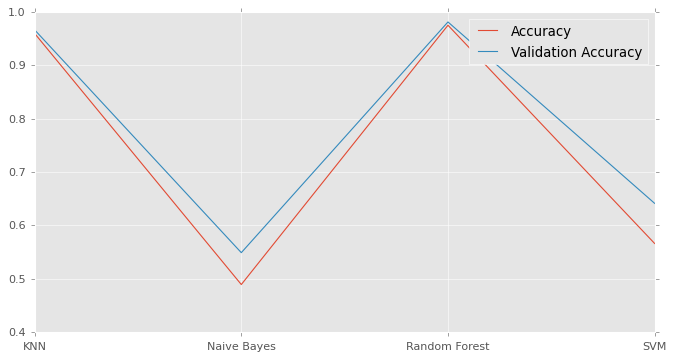

In [37]:
# Plot graph between model1, model2, model3, model4 and their accuracy

models = ['KNN', 'Naive Bayes', 'Random Forest', 'SVM']
accuracy = [model1_acc, model2_acc, model3_acc, model4_acc]
val_accuracy = [model1_val_acc, model2_val_acc, model3_val_acc, model4_val_acc]

plt.figure(figsize=(10,5))
plt.plot(models, accuracy, label='Accuracy')
plt.plot(models, val_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()

In [68]:
df_mitbih_train = pd.read_csv('ECG_dataset/train.csv', header=None)
df_mitbih_test = pd.read_csv('ECG_dataset/test.csv', header=None)
df_mitbih = pd.concat([df_mitbih_train, df_mitbih_test], axis=0)
df_mitbih.rename(columns={187: 'class'}, inplace=True)

id_to_label = {
    0: "Yes",
    1: "No"
}
# df_mitbih['label'] = df_mitbih.iloc[:, 0].map(id_to_label)
print(df_mitbih.info())
print(df_mitbih.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 0 to 179
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 1.4 MB
None
   0         1         2         3         4         5         6         7    \
0    1  0.024133  0.016065  0.044639  0.031001 -0.009473 -0.042663 -0.077283   
1    0  0.424380  0.344420  0.348130  0.340170  0.243370  0.241730  0.268780   
2    0  1.529500  1.776600  1.936700  1.840200  1.800000  1.724900  1.405800   
3    0  1.286500  1.049900  0.793600  0.473590  0.111730 -0.054857 -0.062095   
4    1 -0.175400 -0.121920 -0.053532 -0.024293  0.022917  0.116440  0.187040   

        8         9    ...       131       132       133      134       135  \
0 -0.091508 -0.046114  ...  0.051275  0.061244  0.053409  0.12092  0.081996   
1  0.273420  0.356440  ...  0.526440  0.559020  0.555670  0.59727  0.570760   
2  1.008800  0.724720  ...  0.169600  0.126170  0.258300  0.23859  0.465590   
3 -0.120750 -0.103010  ...  0.966370  1.10

In [69]:
df_mitbih.to_csv('data.csv', index=False)
# config.csv_path = 'data.csv'

In [70]:
# Basic EDA
df_mitbih = pd.read_csv('data.csv')
df_mitbih['label'].value_counts()

KeyError: 'label'

In [71]:
percentages = [count / df_mitbih.shape[0] * 100 for count in df_mitbih['label'].value_counts()]

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(
    x=df_mitbih['label'],
    ax=ax,
    palette="bright",
    order=df_mitbih['label'].value_counts().index
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);

for percentage, count, p in zip(
    percentages,
    df_mitbih['label'].value_counts(sort=True).values,
    ax.patches):
    
    percentage = f'{np.round(percentage, 2)}%'
    x = p.get_x() + p.get_width() / 2 - 0.4
    y = p.get_y() + p.get_height()
    ax.annotate(str(percentage)+" / "+str(count), (x, y), fontsize=12, fontweight='bold')
    
plt.savefig('data_dist.png', facecolor='w', edgecolor='w', format='png',
        transparent=False, bbox_inches='tight', pad_inches=0.1)
plt.savefig('data_dist.svg', facecolor='w', edgecolor='w', format='svg',
        transparent=False, bbox_inches='tight', pad_inches=0.1)

KeyError: 'label'

In [127]:
# Put your codes here
dataset_train = pd.read_csv('ECG_dataset/trainval.csv', header=None)

dataset_train.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046114,...,0.051275,0.061244,0.053409,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836,0.030809
1,0,0.424380,0.344420,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,...,0.526440,0.559020,0.555670,0.59727,0.570760,0.467490,0.463400,0.481880,0.432190,0.394530
2,0,1.529500,1.776600,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,...,0.169600,0.126170,0.258300,0.23859,0.465590,0.640280,0.727650,0.867870,1.058600,1.295300
3,0,1.286500,1.049900,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,...,0.966370,1.106500,1.091900,1.30260,1.572700,1.733700,1.740600,1.711700,1.579300,1.514100
4,1,-0.175400,-0.121920,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,...,-0.234150,-0.248470,-0.177590,-0.22301,-0.277270,-0.233280,-0.252610,-0.264220,-0.176390,-0.154930


In [128]:
dataset_train.shape

(1622, 141)

In [122]:
# # Put your codes here
# training_set = dataset_train.iloc[:,:].values
# training_set.shape

(1622, 141)

In [123]:
# from sklearn.preprocessing import MinMaxScaler
# # Put your codes here
# sc = MinMaxScaler(feature_range= (0, 1))
# training_set_scaled = sc.fit_transform(dataset_train)

In [129]:
dataset_train.shape

(1622, 141)

In [130]:
# X_train = []
# y_train = []
# # Put your codes here
# for i in range(60, 1258):
#     X_train.append(dataset_train[i-60:i, 0])
#     y_train.append(dataset_train[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)

InvalidIndexError: (slice(0, 60, None), 0)

In [90]:
X_train.shape

(1198, 60)

In [91]:
y_train.shape

(1198,)

In [92]:
# Put your codes here
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [93]:
X_train.shape

(1198, 60, 1)

In [131]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.preprocessing import sequence

In [95]:
# Put your codes here
regressor = Sequential()

In [96]:
# Put your codes here
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

In [97]:
# Put your codes here
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

In [98]:
# Put your codes here
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [99]:
# Put your codes here
regressor.add(Dense(units=1))

In [100]:
# Put your codes here
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [101]:
import tensorflow as tf 
tf.random.set_seed(1234)
# Put your codes here
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 18s 18ms/step - loss: 0.2729
Epoch 2/100
38/38 [==============================] - 1s 17ms/step - loss: 0.2472
Epoch 3/100
38/38 [==============================] - 1s 18ms/step - loss: 0.2477
Epoch 4/100
38/38 [==============================] - 1s 18ms/step - loss: 0.2504
Epoch 5/100
38/38 [==============================] - 1s 18ms/step - loss: 0.2501
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.2459
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.2485
Epoch 8/100
38/38 [==============================] - 1s 15ms/step - loss: 0.2455
Epoch 9/100
38/38 [==============================] - 1s 15ms/step - loss: 0.2471
Epoch 10/100
38/38 [==============================] - 1s 15ms/step - loss: 0.2481
Epoch 11/100
38/38 [==============================] - 1s 13ms/step - loss: 0.2465
Epoch 12/100
38/38 [==============================] - 1s 16ms/step - loss: 0.2456
Epoch 13/100
38/38 [====

In [106]:
dataset_train = pd.read_csv('ECG_dataset/train.csv', header=None)
dataset_test = pd.read_csv('ECG_dataset/test.csv', header=None)
# real_stock_price = dataset_test.iloc[:,1:2].values
# real_stock_price

In [107]:
dataset_train

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046114,...,0.051275,0.061244,0.053409,0.120920,0.081996,0.039526,0.073486,0.020875,-0.018836,0.030809
1,0,0.424380,0.344420,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,...,0.526440,0.559020,0.555670,0.597270,0.570760,0.467490,0.463400,0.481880,0.432190,0.394530
2,0,1.529500,1.776600,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,...,0.169600,0.126170,0.258300,0.238590,0.465590,0.640280,0.727650,0.867870,1.058600,1.295300
3,0,1.286500,1.049900,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,...,0.966370,1.106500,1.091900,1.302600,1.572700,1.733700,1.740600,1.711700,1.579300,1.514100
4,1,-0.175400,-0.121920,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,...,-0.234150,-0.248470,-0.177590,-0.223010,-0.277270,-0.233280,-0.252610,-0.264220,-0.176390,-0.154930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0,-1.255800,-1.340100,-1.386800,-1.430800,-1.328500,-1.341800,-1.531000,-1.479100,-1.422600,...,1.195800,1.493400,1.117400,0.609090,0.234080,0.131970,0.140740,0.217210,-0.114400,-0.738990
1077,1,0.146660,0.172600,0.232750,0.222260,0.273200,0.202890,0.218590,0.274840,0.214380,...,0.027458,0.075674,0.048631,0.071620,0.116430,0.082587,0.138510,0.156340,0.151240,0.105630
1078,0,0.181900,0.260210,0.506690,1.105600,1.644200,1.407500,1.656500,1.426300,1.047300,...,0.098542,0.073705,0.084270,0.024167,0.054820,0.082637,0.104860,0.130580,0.207470,0.208090
1079,1,0.074436,0.090372,0.088594,0.009014,-0.042387,0.033361,0.060040,0.037957,0.113220,...,0.361930,0.275060,0.235870,0.172130,0.112840,0.115970,0.113570,0.129590,0.125970,0.086535


In [110]:
dataset_total = pd.concat((dataset_train[0], dataset_test[0]), axis=0)
print(dataset_total.shape)

(1261,)


In [111]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

In [112]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

In [113]:
# Put your codes here
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [114]:
# Put your codes here
predicted_stock_price=regressor.predict(X_test)
print(predicted_stock_price)

[[0.42538574]
 [0.43186146]
 [0.42380443]
 [0.41403678]
 [0.40610433]
 [0.41373765]
 [0.42335558]
 [0.43426806]
 [0.4455412 ]
 [0.44406825]
 [0.4561053 ]
 [0.4680704 ]
 [0.467862  ]
 [0.46860862]
 [0.47481424]
 [0.4736808 ]
 [0.47604573]
 [0.47237128]
 [0.46698076]
 [0.46343845]
 [0.4606442 ]
 [0.45312154]
 [0.44624346]
 [0.44113404]
 [0.43715298]
 [0.43663132]
 [0.42746997]
 [0.41952014]
 [0.41779804]
 [0.40904212]
 [0.40236336]
 [0.39848804]
 [0.39572582]
 [0.39279753]
 [0.39162832]
 [0.3912917 ]
 [0.39153415]
 [0.3926596 ]
 [0.3924833 ]
 [0.39317235]
 [0.3935039 ]
 [0.39196777]
 [0.390078  ]
 [0.38846105]
 [0.38665682]
 [0.38474315]
 [0.38359237]
 [0.37606958]
 [0.37156954]
 [0.37008995]
 [0.3699054 ]
 [0.36971283]
 [0.36928725]
 [0.36988115]
 [0.366459  ]
 [0.3617231 ]
 [0.3614669 ]
 [0.35672593]
 [0.3602156 ]
 [0.35874635]
 [0.3645507 ]
 [0.37225074]
 [0.3759517 ]
 [0.3793887 ]
 [0.3838448 ]
 [0.39339507]
 [0.3963027 ]
 [0.39679426]
 [0.39557207]
 [0.4053464 ]
 [0.40893933]
 [0.42

In [115]:
# Put your codes here
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[0.42538574]
 [0.43186146]
 [0.42380443]
 [0.41403678]
 [0.40610433]
 [0.41373765]
 [0.42335558]
 [0.43426806]
 [0.4455412 ]
 [0.44406825]
 [0.4561053 ]
 [0.4680704 ]
 [0.467862  ]
 [0.46860862]
 [0.47481424]
 [0.4736808 ]
 [0.47604573]
 [0.47237128]
 [0.46698076]
 [0.46343845]
 [0.4606442 ]
 [0.45312154]
 [0.44624346]
 [0.44113404]
 [0.43715298]
 [0.43663132]
 [0.42746997]
 [0.41952014]
 [0.41779804]
 [0.40904212]
 [0.40236336]
 [0.39848804]
 [0.39572582]
 [0.39279753]
 [0.39162832]
 [0.3912917 ]
 [0.39153415]
 [0.3926596 ]
 [0.3924833 ]
 [0.39317235]
 [0.3935039 ]
 [0.39196777]
 [0.390078  ]
 [0.38846105]
 [0.38665682]
 [0.38474315]
 [0.38359237]
 [0.37606958]
 [0.37156954]
 [0.37008995]
 [0.3699054 ]
 [0.36971283]
 [0.36928725]
 [0.36988115]
 [0.366459  ]
 [0.3617231 ]
 [0.3614669 ]
 [0.35672593]
 [0.3602156 ]
 [0.35874635]
 [0.3645507 ]
 [0.37225074]
 [0.3759517 ]
 [0.3793887 ]
 [0.3838448 ]
 [0.39339507]
 [0.3963027 ]
 [0.39679426]
 [0.39557207]
 [0.4053464 ]
 [0.40893933]
 [0.42

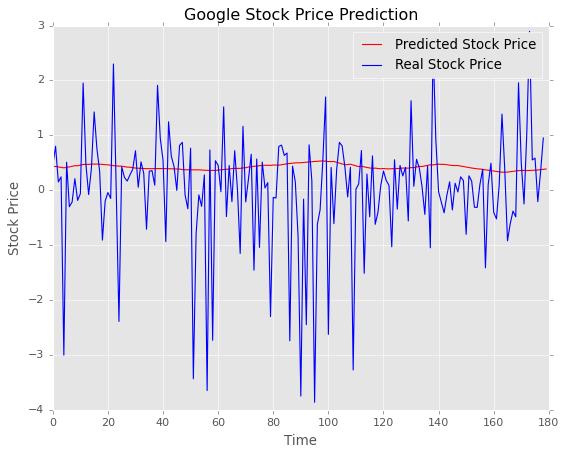

In [116]:
# Put your codes here
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()